<div align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/a3/University_of_Isfahan-Logo.png" width="100" height="100">
</div>

<div dir="rtl" align="center">
  <h1> </h1>
  <h4> Isfahan University - Computer Science </h4>
  <h4 style="color:#3399FF"> Machine Learning </h4>
  <h5> March, 2024 </h5>
  <hr>
  <h2 style="color:#006633"> <strong>Laptop Price Estimation with Linear Regression</strong> </h2>
  <hr>
</div>

### import libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### data

#### getting data

In [5]:
df = pd.read_csv("/content/drive/MyDrive/laptop_price.csv", encoding='ISO-8859-1')

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [6]:
df.shape

(1303, 13)

#### rename columns with better name!

In [7]:
df.rename({
    "Company": "company",
    "Product": "product",
    "TypeName": "type_name",
    "Inches": "inches",
    "ScreenResolution": "screen_resolution",
    "Cpu": "cpu",
    "Ram": "ram",
    "Memory": "memory",
    "Gpu": "gpu",
    "OpSys": "os",
    "Weight": "weight",
    "Price_euros": "price"
}, axis=1, inplace=True)

df.head()

,laptop_ID,company,product,type_name,inches,screen_resolution,cpu,ram,memory,gpu,os,weight,price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   laptop_ID          1303 non-null   int64  
 1   company            1303 non-null   object 
 2   product            1303 non-null   object 
 3   type_name          1303 non-null   object 
 4   inches             1303 non-null   float64
 5   screen_resolution  1303 non-null   object 
 6   cpu                1303 non-null   object 
 7   ram                1303 non-null   object 
 8   memory             1303 non-null   object 
 9   gpu                1303 non-null   object 
 10  os                 1303 non-null   object 
 11  weight             1303 non-null   object 
 12  price              1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
df.describe()

,laptop_ID,inches,price
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [10]:
df.drop(['laptop_ID'], axis=1, inplace=True)

df.head()

,company,product,type_name,inches,screen_resolution,cpu,ram,memory,gpu,os,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


#### uniqueness exploring

In [11]:
df['company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [12]:
df['type_name'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [13]:
df['ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [14]:
df['os'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [15]:
df['inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 13.5, 12.5, 13. ,
       18.4, 13.9, 12.3, 17. , 15. , 14.1, 11.3])

In [16]:
df['cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [17]:
df['memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
df['screen_resolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

#### feature extraction

In [ ]:
df.head()

,company,product,type_name,inches,screen_resolution,cpu,ram,memory,gpu,os,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [27]:
df['cpu_company'] = df['cpu'].apply(lambda x: x.split()[0])

In [33]:
df['cpu_frequency'] = df['cpu'].apply(lambda x: float(x.split()[-1][:-3]))  # -3 is for removing `GHz`

In [35]:
memory = df['memory'].apply(lambda x: x.split(" +  ")).apply(pd.Series)

memory.loc[memory[1].isnull(), 1] = 0
memory.loc[~memory[1].isnull(), 1] = 1

memory

,0,1
0,128GB SSD,1
1,128GB Flash Storage,1
2,256GB SSD,1
3,512GB SSD,1
4,256GB SSD,1
...,...,...
1298,128GB SSD,1
1299,512GB SSD,1
1300,64GB Flash Storage,1
1301,1TB HDD,1


In [36]:
df['memory_extra'] = memory[1].copy()

In [37]:
df['memory_volume'] = memory[0].apply(lambda x: float(x.split()[0][:-2]))

In [38]:
df['memory_type'] = memory[0].apply(lambda x: " ".join(x.split()[1:]))

In [40]:
df.drop(['product', 'memory', 'cpu'], axis=1, inplace=True)

In [42]:
df['weight'] = df['weight'].apply(lambda x: float(x[:-2]))

In [43]:
df['ram'] = df['ram'].apply(lambda x: int(x[:-2]))

In [55]:
df['screen_resolution'].apply(lambda x: x.split()[-1].split("x")).apply(pd.Series).rename({0: "rs_width", 1: "rs_height"}, axis=1).astype(int)

,rs_width,rs_height
0,2560,1600
1,1440,900
2,1920,1080
3,2880,1800
4,2560,1600
...,...,...
1298,1920,1080
1299,3200,1800
1300,1366,768
1301,1366,768


In [56]:
tmp = df['screen_resolution'].apply(lambda x: x.split()[-1].split("x")).apply(pd.Series).rename({0: "rs_width", 1: "rs_height"}, axis=1).astype(int)

df = pd.concat([df, tmp], axis=1)

In [58]:
df.drop(['screen_resolution'], axis=1, inplace=True)

In [59]:
df

,company,type_name,inches,ram,gpu,os,weight,price,cpu_company,cpu_frequency,memory_extra,memory_volume,memory_type,rs_width,rs_height
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,2.3,1,128.0,SSD,2560,1600
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,1.8,1,128.0,Flash Storage,1440,900
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,Intel,2.5,1,256.0,SSD,1920,1080
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,2.7,1,512.0,SSD,2880,1800
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,3.1,1,256.0,SSD,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,638.00,Intel,2.5,1,128.0,SSD,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,1499.00,Intel,2.5,1,512.0,SSD,3200,1800
1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,229.00,Intel,1.6,1,64.0,Flash Storage,1366,768
1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,Intel,2.5,1,1.0,HDD,1366,768


In [60]:
df['company'], _ = pd.factorize(df['company'])

df['type_name'], _ = pd.factorize(df['type_name'])

df['os'], _ = pd.factorize(df['os'])

df['cpu_company'], _ = pd.factorize(df['cpu_company'])

df['memory_type'], _ = pd.factorize(df['memory_type'])

df.head()

,company,type_name,inches,ram,gpu,os,weight,price,cpu_company,cpu_frequency,memory_extra,memory_volume,memory_type,rs_width,rs_height
0,0,0,13.3,8,Intel Iris Plus Graphics 640,0,1.37,1339.69,0,2.3,1,128.0,0,2560,1600
1,0,0,13.3,8,Intel HD Graphics 6000,0,1.34,898.94,0,1.8,1,128.0,1,1440,900
2,1,1,15.6,8,Intel HD Graphics 620,1,1.86,575.00,0,2.5,1,256.0,0,1920,1080
3,0,0,15.4,16,AMD Radeon Pro 455,0,1.83,2537.45,0,2.7,1,512.0,0,2880,1800
4,0,0,13.3,8,Intel Iris Plus Graphics 650,0,1.37,1803.60,0,3.1,1,256.0,0,2560,1600


In [61]:
df['gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [62]:
df['gpu_version'] = df['gpu'].apply(lambda x: x.split()[-1])

In [65]:
df['gpu_model'] = df['gpu'].apply(lambda x: " ".join(x.split()[:-1]))

In [64]:
df.head()

,company,type_name,inches,ram,gpu,os,weight,price,cpu_company,cpu_frequency,memory_extra,memory_volume,memory_type,rs_width,rs_height,gpu_model,gpu_version
0,0,0,13.3,8,Intel Iris Plus Graphics 640,0,1.37,1339.69,0,2.3,1,128.0,0,2560,1600,640,Intel Iris Plus Graphics
1,0,0,13.3,8,Intel HD Graphics 6000,0,1.34,898.94,0,1.8,1,128.0,1,1440,900,6000,Intel HD Graphics
2,1,1,15.6,8,Intel HD Graphics 620,1,1.86,575.00,0,2.5,1,256.0,0,1920,1080,620,Intel HD Graphics
3,0,0,15.4,16,AMD Radeon Pro 455,0,1.83,2537.45,0,2.7,1,512.0,0,2880,1800,455,AMD Radeon Pro
4,0,0,13.3,8,Intel Iris Plus Graphics 650,0,1.37,1803.60,0,3.1,1,256.0,0,2560,1600,650,Intel Iris Plus Graphics


In [66]:
df.drop(['gpu'], axis=1, inplace=True)

In [67]:
# df['gpu_model'].replace(r'\$-','0').astype(float)
df

,company,type_name,inches,ram,os,weight,price,cpu_company,cpu_frequency,memory_extra,memory_volume,memory_type,rs_width,rs_height,gpu_model,gpu_version
0,0,0,13.3,8,0,1.37,1339.69,0,2.3,1,128.0,0,2560,1600,Intel Iris Plus Graphics,Intel Iris Plus Graphics
1,0,0,13.3,8,0,1.34,898.94,0,1.8,1,128.0,1,1440,900,Intel HD Graphics,Intel HD Graphics
2,1,1,15.6,8,1,1.86,575.00,0,2.5,1,256.0,0,1920,1080,Intel HD Graphics,Intel HD Graphics
3,0,0,15.4,16,0,1.83,2537.45,0,2.7,1,512.0,0,2880,1800,AMD Radeon Pro,AMD Radeon Pro
4,0,0,13.3,8,0,1.37,1803.60,0,3.1,1,256.0,0,2560,1600,Intel Iris Plus Graphics,Intel Iris Plus Graphics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,5,4,14.0,4,2,1.80,638.00,0,2.5,1,128.0,0,1920,1080,Intel HD Graphics,Intel HD Graphics
1299,5,4,13.3,16,2,1.30,1499.00,0,2.5,1,512.0,0,3200,1800,Intel HD Graphics,Intel HD Graphics
1300,5,1,14.0,2,2,1.50,229.00,0,1.6,1,64.0,1,1366,768,Intel HD,Intel HD
1301,1,1,15.6,6,2,2.19,764.00,0,2.5,1,1.0,2,1366,768,AMD Radeon R5,AMD Radeon R5


In [68]:
df['gpu_model'], _ = pd.factorize(df['gpu_model'])

In [71]:
X = df[['company', 'type_name',	'inches',	'ram',	'os', 'weight',	'cpu_company',
        'cpu_frequency',	'memory_extra',	'memory_volume',	'memory_type',	'rs_width', 'rs_height', 'gpu_model']]


y = df['price']

In [72]:
X

,company,type_name,inches,ram,os,weight,cpu_company,cpu_frequency,memory_extra,memory_volume,memory_type,rs_width,rs_height,gpu_model
0,0,0,13.3,8,0,1.37,0,2.3,1,128.0,0,2560,1600,0
1,0,0,13.3,8,0,1.34,0,1.8,1,128.0,1,1440,900,1
2,1,1,15.6,8,1,1.86,0,2.5,1,256.0,0,1920,1080,1
3,0,0,15.4,16,0,1.83,0,2.7,1,512.0,0,2880,1800,2
4,0,0,13.3,8,0,1.37,0,3.1,1,256.0,0,2560,1600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,5,4,14.0,4,2,1.80,0,2.5,1,128.0,0,1920,1080,1
1299,5,4,13.3,16,2,1.30,0,2.5,1,512.0,0,3200,1800,1
1300,5,1,14.0,2,2,1.50,0,1.6,1,64.0,1,1366,768,9
1301,1,1,15.6,6,2,2.19,0,2.5,1,1.0,2,1366,768,7


In [73]:
y

0       1339.69
1        898.94
2        575.00
3       2537.45
4       1803.60
         ...   
1298     638.00
1299    1499.00
1300     229.00
1301     764.00
1302     369.00
Name: price, Length: 1303, dtype: float64

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [76]:
print(f"x_train'shape: {x_train.shape}")
print(f"y_train'shape: {y_train.shape}")
print()
print(f"x_test'shape: {x_test.shape}")
print(f"y_test'shape: {y_test.shape}")

x_train'shape: (1042, 14)
y_train'shape: (1042,)

x_test'shape: (261, 14)
y_test'shape: (261,)


### model

In [77]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [79]:
model.fit(x_train, y_train)

LinearRegression()

### evaluation

In [82]:
pred_02 = model.predict(x_test)

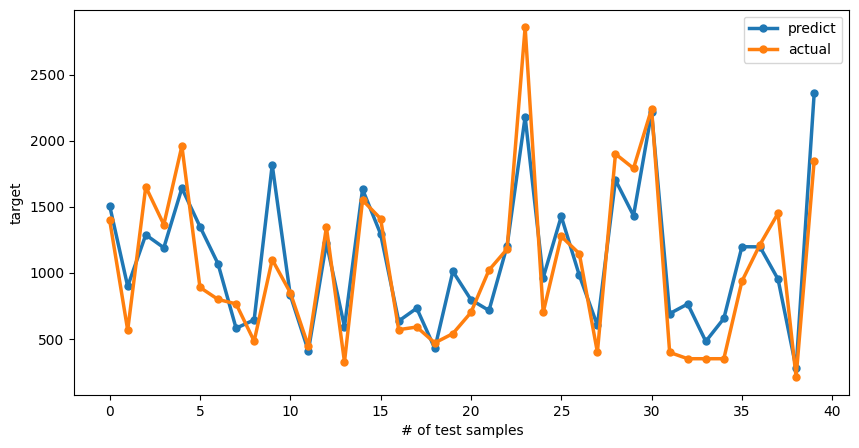

In [95]:
fig, ax = plt.subplots(figsize=(10, 5))

_ = ax.plot(pred_02[40:80], label='predict', marker='.', linewidth=2.5, markersize=10)
_ = ax.plot(y_test[40:80].values, label='actual', marker='.', linewidth=2.5, markersize=10)

# _ = ax.text(60, 3000, f'MSE = {round(mean_absolute_error(y_test, pred), 3)}', bbox=dict(facecolor='none', boxstyle='round,pad=1'))

_ = ax.set_xlabel('# of test samples')
_ = ax.set_ylabel('target')
_ = ax.legend()

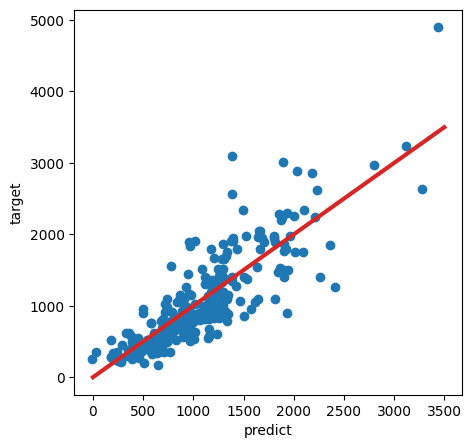

In [91]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(pred_02, y_test)

_ = ax.plot(np.arange(3500), np.arange(3500), color='tab:red', linewidth=3)

_ = ax.set_xlabel('predict')
_ = ax.set_ylabel('target')


In [94]:
r2_score(y_test, pred_02)

0.711363259714002